In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat

In [25]:
d=loadmat("dataset/DREAMER.mat")

In [ ]:
# dream=d["DREANER"]

In [26]:
def mat_scalar(x):
    """Safely extract MATLAB scalar wrapped in arrays"""
    try:
        return x.item()
    except Exception:
        return x


In [28]:
dreamer = d["DREAMER"][0, 0]
data = dreamer["Data"]

valence, arousal, dominance = [], [], []

n_subjects, n_trials = data.shape

for s in range(n_subjects):
    for t in range(n_trials):
        trial = data[s, t]
        valence.append(mat_scalar(trial["ScoreValence"]))
        arousal.append(mat_scalar(trial["ScoreArousal"]))
        dominance.append(mat_scalar(trial["ScoreDominance"]))

valence   = np.asarray(valence).ravel()
arousal   = np.asarray(arousal).ravel()
dominance = np.asarray(dominance).ravel()

print(valence.shape, arousal.shape, dominance.shape)


(414,) (414,) (414,)


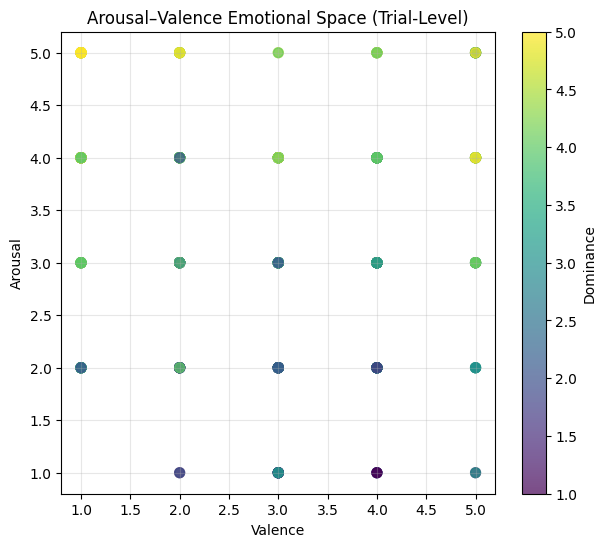

In [29]:
plt.figure(figsize=(7, 6))

sc = plt.scatter(
    valence,
    arousal,
    c=dominance,
    cmap="viridis",
    alpha=0.7,
    s=50
)

plt.colorbar(sc, label="Dominance")
plt.xlabel("Valence")
plt.ylabel("Arousal")
plt.title("Arousal–Valence Emotional Space (Trial-Level)")
plt.grid(True, alpha=0.3)

plt.show()


In [ ]:
val_s, aro_s, dom_s = [], [], []

for t in range(n_trials):
    v_t, a_t, d_t = [], [], []
    for s in range(n_subjects):
        trial = data[s, t]
        v_t.append(mat_scalar(trial["ScoreValence"]))
        a_t.append(mat_scalar(trial["ScoreArousal"]))
        d_t.append(mat_scalar(trial["ScoreDominance"]))
    val_s.append(np.mean(v_t))
    aro_s.append(np.mean(a_t))
    dom_s.append(np.mean(d_t))

x = np.arange(n_trials)


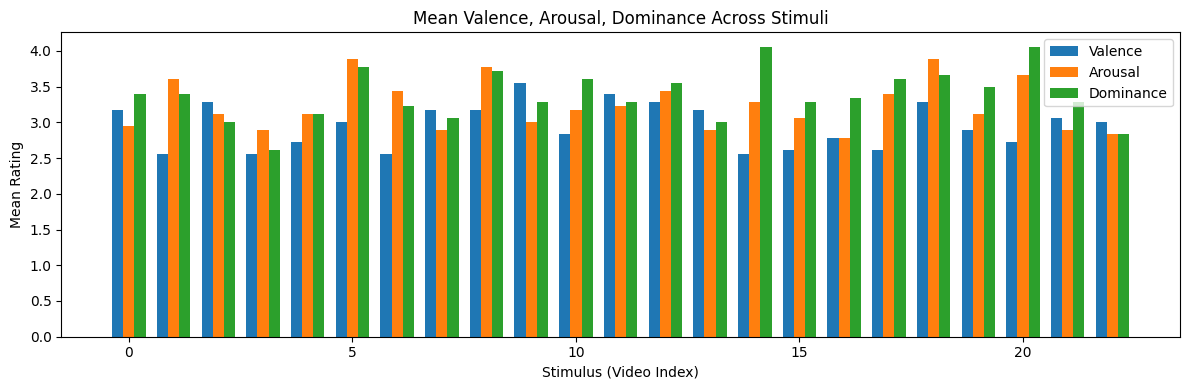

In [31]:
plt.figure(figsize=(12, 4))

plt.bar(x - 0.25, val_s, width=0.25, label="Valence")
plt.bar(x,         aro_s, width=0.25, label="Arousal")
plt.bar(x + 0.25, dom_s, width=0.25, label="Dominance")

plt.xlabel("Stimulus (Video Index)")
plt.ylabel("Mean Rating")
plt.title("Mean Valence, Arousal, Dominance Across Stimuli")
plt.legend()
plt.tight_layout()

plt.show()


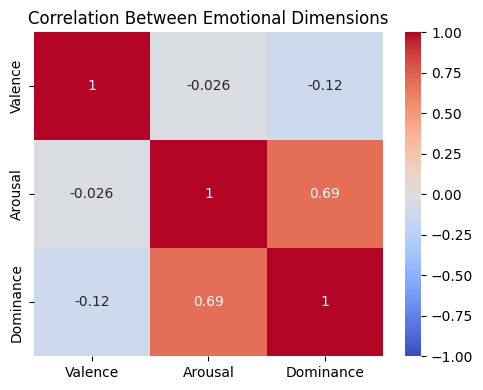

In [32]:
vad = np.vstack([valence, arousal, dominance]).T
corr = np.corrcoef(vad, rowvar=False)

labels = ["Valence", "Arousal", "Dominance"]

plt.figure(figsize=(5, 4))
sns.heatmap(
    corr,
    xticklabels=labels,
    yticklabels=labels,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1
)

plt.title("Correlation Between Emotional Dimensions")
plt.tight_layout()
plt.show()


In [33]:
import numpy as np
from scipy.stats import pearsonr, spearmanr

def describe_vector(name, x):
    print(f"\n=== {name} ===")
    print(f"Count        : {len(x)}")
    print(f"Min / Max    : {np.min(x)} / {np.max(x)}")
    print(f"Mean         : {np.mean(x):.3f}")
    print(f"Std Dev      : {np.std(x):.3f}")
    print(f"Median       : {np.median(x)}")
    print(f"25% / 75%    : {np.percentile(x, 25)} / {np.percentile(x, 75)}")
    print(f"Unique values: {np.unique(x)}")

def quadrant_counts(valence, arousal):
    v_med = np.median(valence)
    a_med = np.median(arousal)

    q1 = np.sum((valence >= v_med) & (arousal >= a_med))  # High V, High A
    q2 = np.sum((valence <  v_med) & (arousal >= a_med))  # Low V, High A
    q3 = np.sum((valence <  v_med) & (arousal <  a_med))  # Low V, Low A
    q4 = np.sum((valence >= v_med) & (arousal <  a_med))  # High V, Low A

    print("\n=== Arousal–Valence Quadrant Counts (Median Split) ===")
    print(f"High Valence, High Arousal : {q1}")
    print(f"Low  Valence, High Arousal : {q2}")
    print(f"Low  Valence, Low  Arousal : {q3}")
    print(f"High Valence, Low  Arousal : {q4}")

def correlation_report(x, y, name_x, name_y):
    p_r, p_p = pearsonr(x, y)
    s_r, s_p = spearmanr(x, y)

    print(f"\n=== Correlation: {name_x} vs {name_y} ===")
    print(f"Pearson r     : {p_r:.3f} (p = {p_p:.3e})")
    print(f"Spearman rho  : {s_r:.3f} (p = {s_p:.3e})")

# ---------- RUN EVERYTHING ----------

print("\n################ PHASE 1 INTERPRETATION SUMMARY ################")

describe_vector("Valence", valence)
describe_vector("Arousal", arousal)
describe_vector("Dominance", dominance)

quadrant_counts(valence, arousal)

correlation_report(valence, arousal, "Valence", "Arousal")
correlation_report(valence, dominance, "Valence", "Dominance")
correlation_report(arousal, dominance, "Arousal", "Dominance")

print("\n===============================================================")



################ PHASE 1 INTERPRETATION SUMMARY ################

=== Valence ===
Count        : 414
Min / Max    : 1 / 5
Mean         : 2.952
Std Dev      : 1.318
Median       : 3.0
25% / 75%    : 2.0 / 4.0
Unique values: [1 2 3 4 5]

=== Arousal ===
Count        : 414
Min / Max    : 1 / 5
Mean         : 3.229
Std Dev      : 1.080
Median       : 3.0
25% / 75%    : 2.0 / 4.0
Unique values: [1 2 3 4 5]

=== Dominance ===
Count        : 414
Min / Max    : 1 / 5
Mean         : 3.374
Std Dev      : 1.069
Median       : 3.0
25% / 75%    : 3.0 / 4.0
Unique values: [1 2 3 4 5]

=== Arousal–Valence Quadrant Counts (Median Split) ===
High Valence, High Arousal : 176
Low  Valence, High Arousal : 124
Low  Valence, Low  Arousal : 37
High Valence, Low  Arousal : 77

=== Correlation: Valence vs Arousal ===
Pearson r     : -0.026 (p = 5.958e-01)
Spearman rho  : -0.017 (p = 7.260e-01)

=== Correlation: Valence vs Dominance ===
Pearson r     : -0.116 (p = 1.846e-02)
Spearman rho  : -0.108 (p = 2.852e-

# Phase 1 — Exploratory Analysis & Emotional Space Interpretation (DREAMER)

## Overview
This phase analyzes the **emotional ground truth** of the DREAMER dataset before any EEG processing. Using **trial-level analysis** (23 subjects × 18 stimuli = **414 trials**), we validate whether the provided Valence–Arousal–Dominance (VAD) ratings are structured, theory-consistent, and suitable for downstream affect recognition.

---

## 1. Distribution of Emotional Ratings

All three dimensions span the full Likert scale **[1–5]**, confirming complete coverage of the intended emotional range.

### Valence
- Count: 414  
- Min / Max: 1 / 5  
- Mean: **2.95**, Median: **3**  
- Std Dev: **1.32**  
- IQR (25%–75%): **2–4**

**Interpretation:**  
Valence is centered around neutrality with relatively high variability, indicating diverse perceptions of pleasantness across trials.

### Arousal
- Count: 414  
- Min / Max: 1 / 5  
- Mean: **3.23**, Median: **3**  
- Std Dev: **1.08**  
- IQR (25%–75%): **2–4**

**Interpretation:**  
Arousal shows a slight bias toward higher values, reflecting that audio-visual stimuli tend to elicit emotionally intense responses.

### Dominance
- Count: 414  
- Min / Max: 1 / 5  
- Mean: **3.37**, Median: **3**  
- Std Dev: **1.07**  
- IQR (25%–75%): **3–4**

**Interpretation:**  
Dominance ratings are more tightly clustered, suggesting greater agreement among participants regarding perceived control or engagement.

---

## 2. Arousal–Valence Emotional Space (Quadrant Analysis)

Using a **median split** (Valence = 3, Arousal = 3), all four emotional quadrants are populated:

- **High Valence, High Arousal:** 176 trials  
- **Low Valence, High Arousal:** 124 trials  
- **Low Valence, Low Arousal:** 37 trials  
- **High Valence, Low Arousal:** 77 trials  

**Interpretation:**  
The distribution spans all quadrants, forming a **circumplex-like structure** consistent with established affective models. However, the dataset is biased toward **high-arousal states**, while low-arousal & low-valence emotions are underrepresented. This reflects the nature of audio-visual stimuli and foreshadows potential **class imbalance** in later classification tasks.

---

## 3. Correlation Analysis Between Emotional Dimensions

### Valence ↔ Arousal
- Pearson r = **−0.026** (p = 0.596)  
- Spearman ρ = **−0.017** (p = 0.726)

**Interpretation:**  
No significant relationship exists between valence and arousal, indicating that **emotional pleasantness and intensity are statistically independent** in this dataset.

### Valence ↔ Dominance
- Pearson r = **−0.116** (p = 0.018)  
- Spearman ρ = **−0.108** (p = 0.029)

**Interpretation:**  
A weak but significant negative correlation suggests that certain negative emotions may still be associated with a sense of control (e.g., focused anger or determination), highlighting that dominance is not simply a proxy for positivity.

### Arousal ↔ Dominance
- Pearson r = **0.693** (p ≪ 0.001)  
- Spearman ρ = **0.698** (p ≪ 0.001)

**Interpretation:**  
A strong positive correlation indicates that **higher emotional intensity is closely linked to increased perceived dominance or engagement**. This suggests partially overlapping affective constructs and potentially shared neural correlates.

---

## 4. Key Takeaways

- The DREAMER dataset exhibits a **well-structured emotional ground truth** aligned with the **Circumplex Model of Affect**.
- Valence and arousal are **independent dimensions**, justifying separate affect recognition tasks.
- Arousal and dominance are **strongly coupled**, which may influence feature redundancy in classification.
- Emotional responses are biased toward **high-arousal states**, implying class imbalance considerations for later stages.
- Trial-level analysis preserves meaningful **inter-subject variability**, strengthening downstream modeling.

**Conclusion:**  
Phase 1 confirms that the emotional labels in DREAMER are psychologically valid, statistically sound, and suitable for EEG-based affect recognition.

---


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, butter, filtfilt


In [ ]:
dreamer = d["DREAMER"][0, 0]
data = dreamer["Data"]
fs = int(dreamer["EEG_SamplingRate"].item())

# pick subject 0, trial 0 (arbitrary but consistent)
trial = data[0, 0]
eeg = trial["EEG"]


In [49]:
def get_stimulus_eeg(trial):
    """
    Robust DREAMER EEG extractor.
    Always returns float64 array of shape (channels, time).
    """
    eeg_struct = trial["EEG"][0, 0]
    stim = eeg_struct["stimuli"]

    # unwrap MATLAB cell / object layers
    while isinstance(stim, np.ndarray) and stim.dtype == object:
        stim = stim[0, 0]

    # NOW stim is numeric
    eeg = np.array(stim, dtype=np.float64)

    # fix orientation → (channels, time)
    if eeg.shape[0] > eeg.shape[1]:
        eeg = eeg.T

    return eeg


In [50]:
eeg = get_stimulus_eeg(trial)
print("EEG shape (channels, time):", eeg.shape)
print("EEG dtype:", eeg.dtype)


EEG shape (channels, time): (14, 25472)
EEG dtype: float64


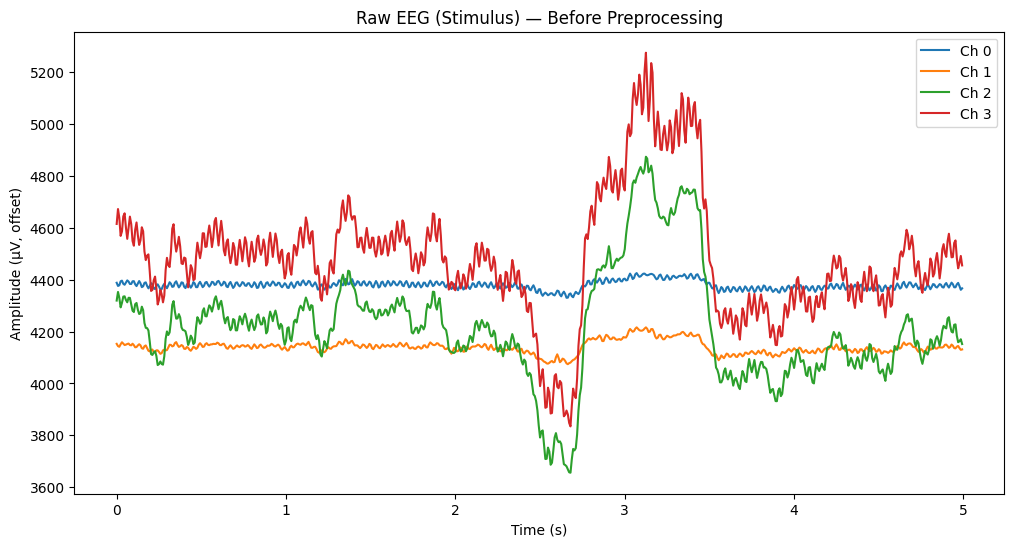

In [51]:
duration = 5  # seconds
samples = duration * fs
t = np.arange(samples) / fs

plt.figure(figsize=(12, 6))

for ch in range(4):
    y = eeg[ch, :samples].ravel()
    plt.plot(t, y + ch * 50, label=f"Ch {ch}")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV, offset)")
plt.title("Raw EEG (Stimulus) — Before Preprocessing")
plt.legend()
plt.show()


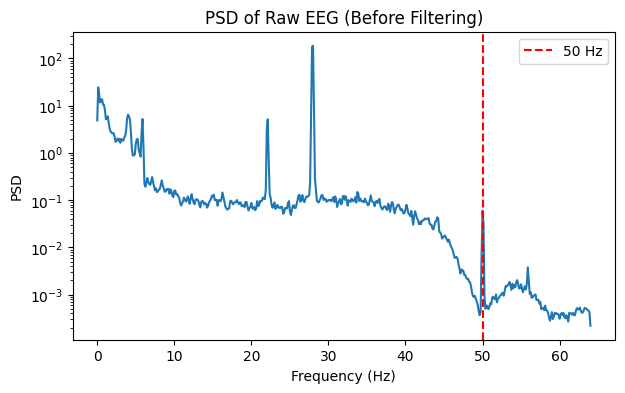

In [52]:
freqs, psd_raw = welch(eeg[0], fs=fs, nperseg=1024)

plt.figure(figsize=(7, 4))
plt.semilogy(freqs, psd_raw)
plt.axvline(50, color="r", linestyle="--", label="50 Hz")
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD")
plt.title("PSD of Raw EEG (Before Filtering)")
plt.legend()
plt.show()


In [53]:
def notch_filter(x, fs, freq=50):
    b, a = butter(
        2,
        [(freq - 1) / (fs / 2), (freq + 1) / (fs / 2)],
        btype="bandstop"
    )
    return filtfilt(b, a, x)


In [54]:
def bandpass_filter(x, fs, low=0.5, high=45):
    b, a = butter(
        4,
        [low / (fs / 2), high / (fs / 2)],
        btype="bandpass"
    )
    return filtfilt(b, a, x)


In [55]:
eeg_filt = np.zeros_like(eeg)

for ch in range(eeg.shape[0]):
    sig = eeg[ch]
    sig = notch_filter(sig, fs)
    sig = bandpass_filter(sig, fs)
    eeg_filt[ch] = sig


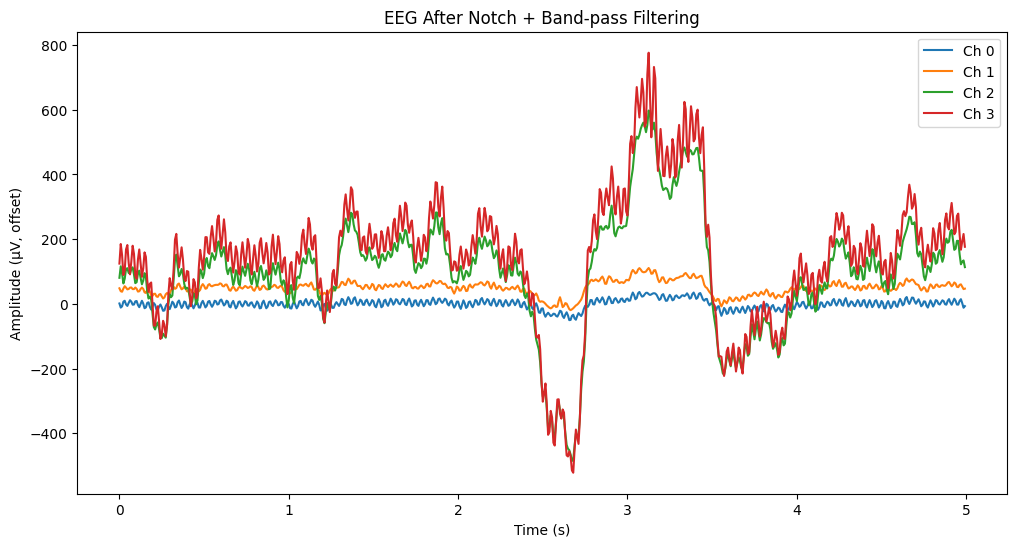

In [56]:
plt.figure(figsize=(12, 6))

for ch in range(4):
    y = eeg_filt[ch, :samples].ravel()
    plt.plot(t, y + ch * 50, label=f"Ch {ch}")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV, offset)")
plt.title("EEG After Notch + Band-pass Filtering")
plt.legend()
plt.show()


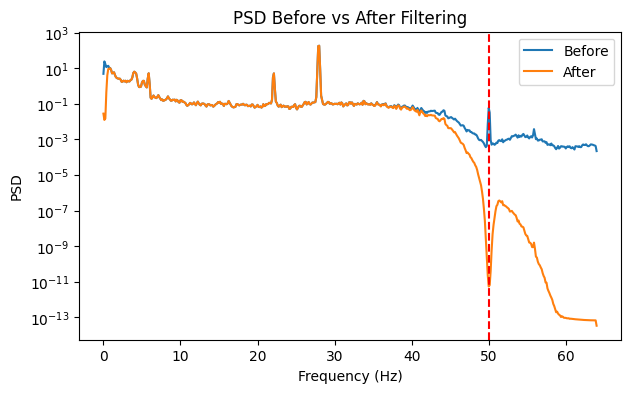

In [57]:
freqs_f, psd_filt = welch(eeg_filt[0], fs=fs, nperseg=1024)

plt.figure(figsize=(7, 4))
plt.semilogy(freqs, psd_raw, label="Before")
plt.semilogy(freqs_f, psd_filt, label="After")
plt.axvline(50, color="r", linestyle="--")
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD")
plt.title("PSD Before vs After Filtering")
plt.legend()
plt.show()


In [58]:
import mne

channel_names = [
    "AF3","F7","F3","FC5","T7","P7","O1",
    "O2","P8","T8","FC6","F4","F8","AF4"
]

info = mne.create_info(
    ch_names=channel_names,
    sfreq=fs,
    ch_types="eeg"
)

raw = mne.io.RawArray(eeg, info)
raw.set_montage("standard_1020")


Creating RawArray with float64 data, n_channels=14, n_times=25472
    Range : 0 ... 25471 =      0.000 ...   198.992 secs
Ready.


<RawArray | 14 x 25472 (199.0 s), ~2.7 MiB, data loaded>

In [61]:
raw_ica = raw.copy().filter(l_freq=1.0, h_freq=40.0)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 423 samples (3.305 s)



In [62]:
from mne.preprocessing import ICA

ica = ICA(
    n_components=14,
    random_state=97,
    max_iter="auto"
)

ica.fit(raw_ica)


Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 2.5s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,28 iterations on raw data (25472 samples)
ICA components,14
Available PCA components,14
Channel types,eeg
ICA components marked for exclusion,—


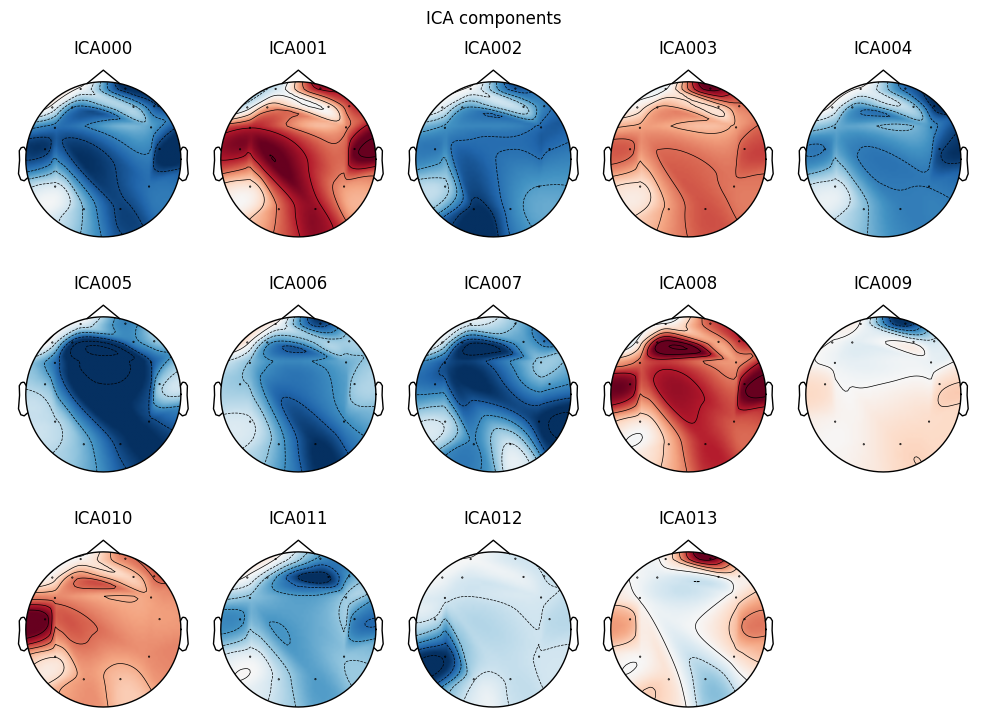

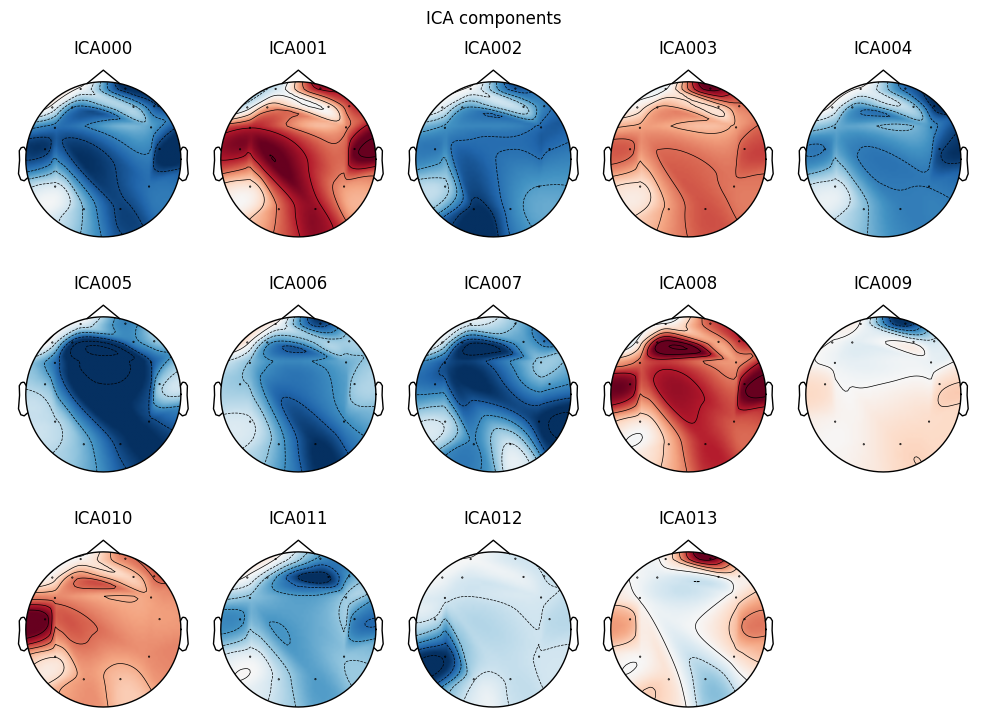

In [63]:
ica.plot_components()


Creating RawArray with float64 data, n_channels=14, n_times=25472
    Range : 0 ... 25471 =      0.000 ...   198.992 secs
Ready.
Using matplotlib as 2D backend.


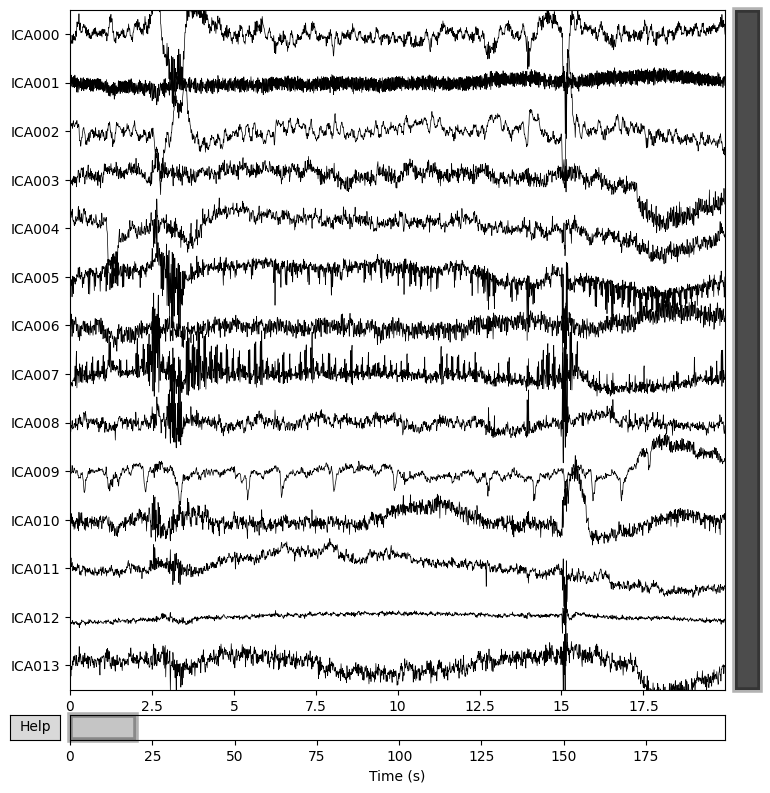

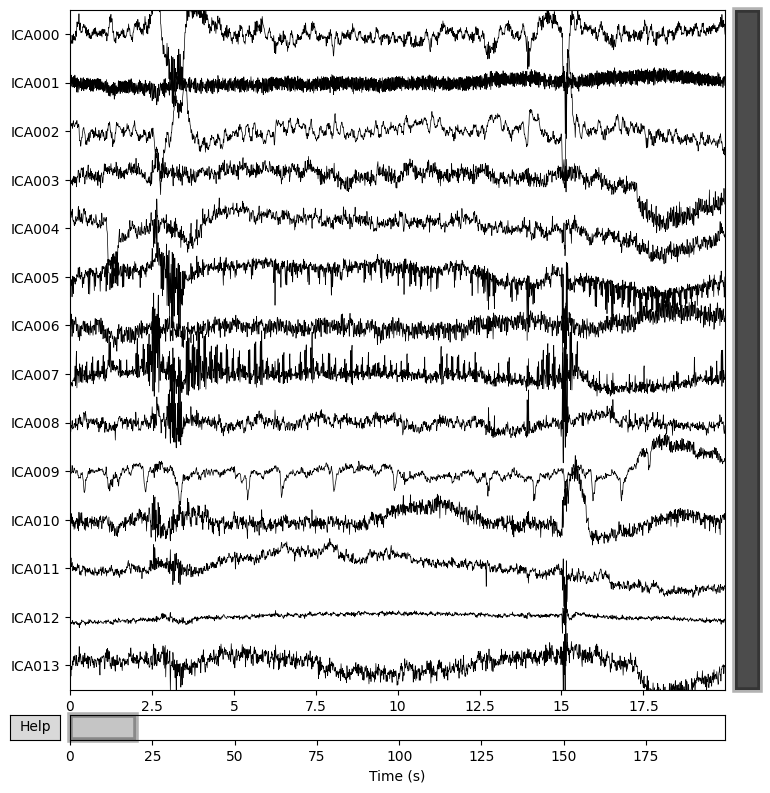

In [64]:
ica.plot_sources(raw)


In [65]:
ica.exclude = [9, 12, 13]


In [66]:
raw_ica_clean = ica.apply(raw.copy())


Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 3 ICA components
    Projecting back using 14 PCA components


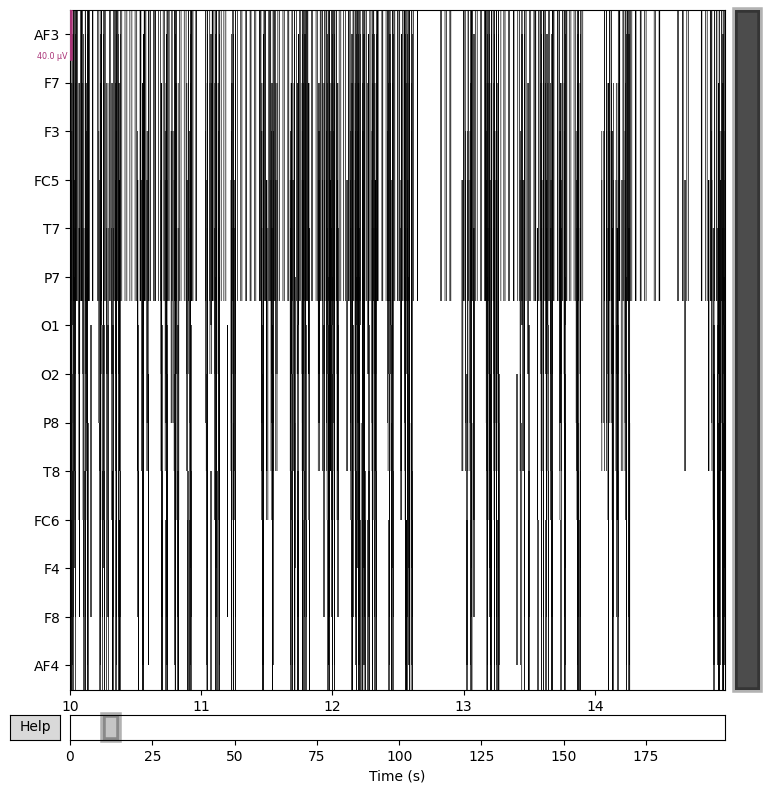

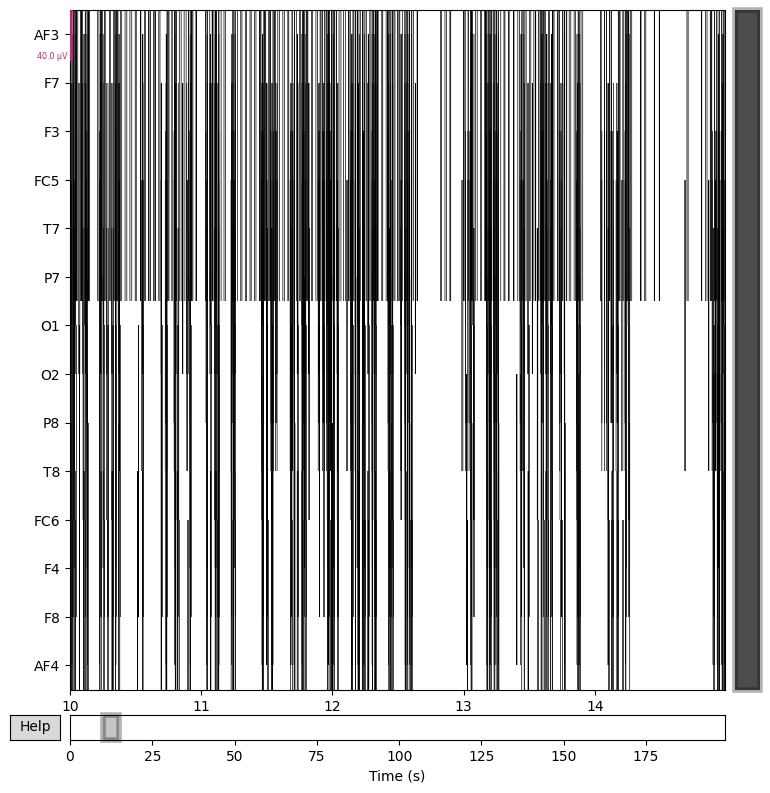

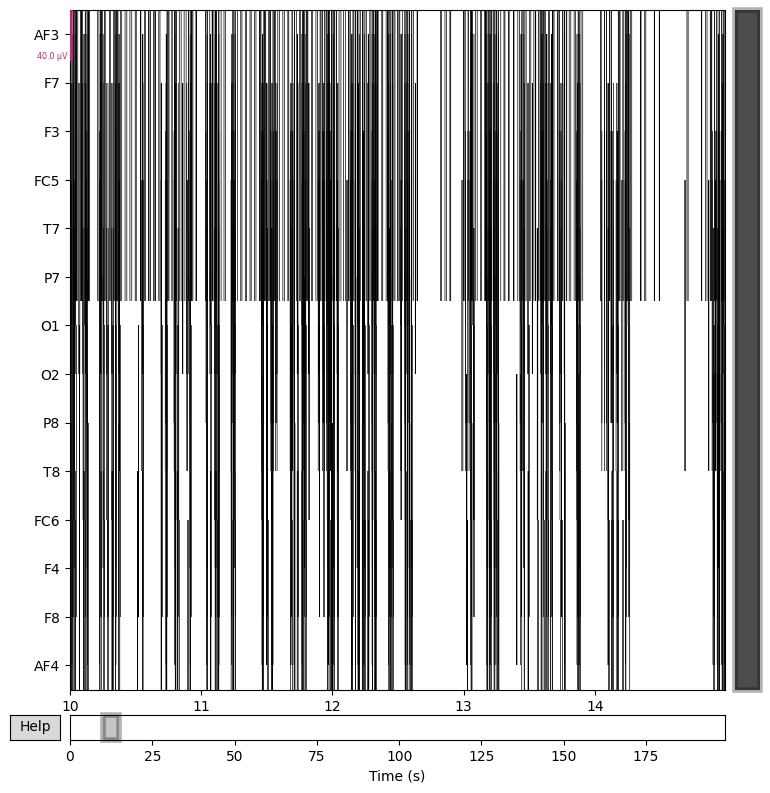

In [67]:
raw.plot(start=10, duration=5, title="Before ICA")
raw_ica_clean.plot(start=10, duration=5, title="After ICA")


In [69]:
import mne

epochs = mne.make_fixed_length_epochs(
    raw_ica_clean,
    duration=2.0,   # seconds
    preload=True
)

print(epochs)


Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 99 events and 256 original time points ...
0 bad epochs dropped
<Epochs | 99 events (all good), 0 – 1.992 s (baseline off), ~2.7 MiB, data loaded,
 '1': 99>


In [70]:
from autoreject import AutoReject

ar = AutoReject(
    n_interpolate=[1, 2, 4],
    random_state=42
)

epochs_clean = ar.fit_transform(epochs)


/home/tba/projects/neurahack-iitm/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running autoreject on ch_type=eeg


100%|██████████| Creating augmented epochs : 14/14 [00:00<00:00,  145.24it/s]
100%|██████████| Computing thresholds ... : 14/14 [00:17<00:00,    1.23s/it]

































100%|██████████| Repairing epochs : 99/99 [00:00<00:00,  160.64it/s]


































100%|██████████| Repairing epochs : 99/99 [00:00<00:00,  154.02it/s]






















100%|██████████| Fold : 10/10 [00:00<00:00,   13.39it/s]



































100%|██████████| Repairing epochs : 99/99 [00:00<00:00,  153.70it/s]






















100%|██████████| Fold : 10/10 [00:00<00:00,   14.62it/s]





































100%|██████████| Repairing epochs : 99/99 [00:00<00:00,  144.43it/s]






















100%|██████████| Fold : 10/10 [00:00<00:00,   13.47it/s]
100%|██████████| n_interp : 3/3 [00:04<00:00,    1.46s/it]






Estimated consensus=0.10 and n_interpolate=1





































100%|██████████| Repairing epochs : 99/99 [00:00<00:00,  153.10it/s]

Dropped 26 epochs: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 16, 25, 28, 34, 35, 38, 45, 55, 65, 76, 79, 80


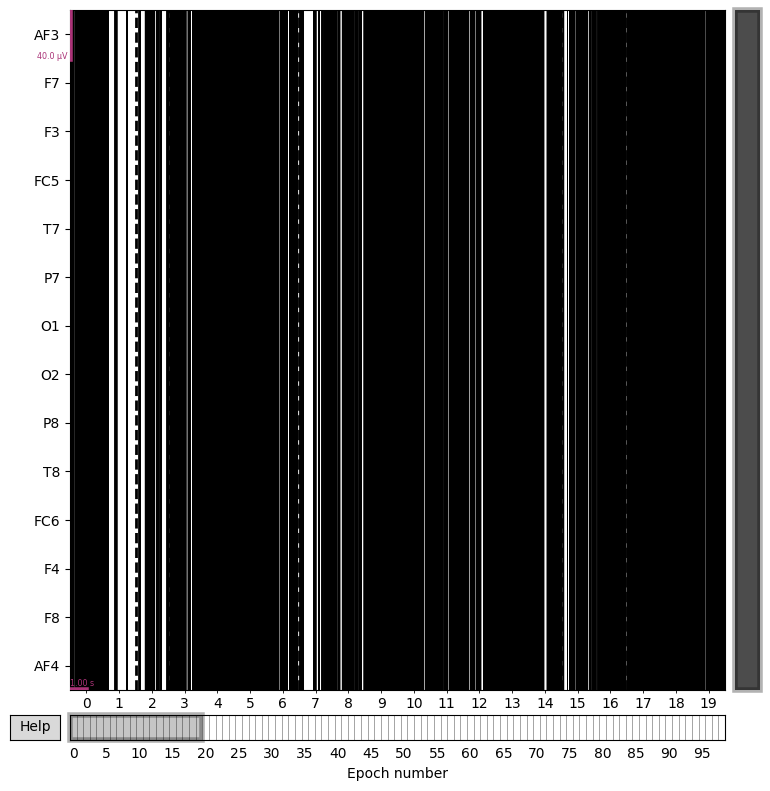

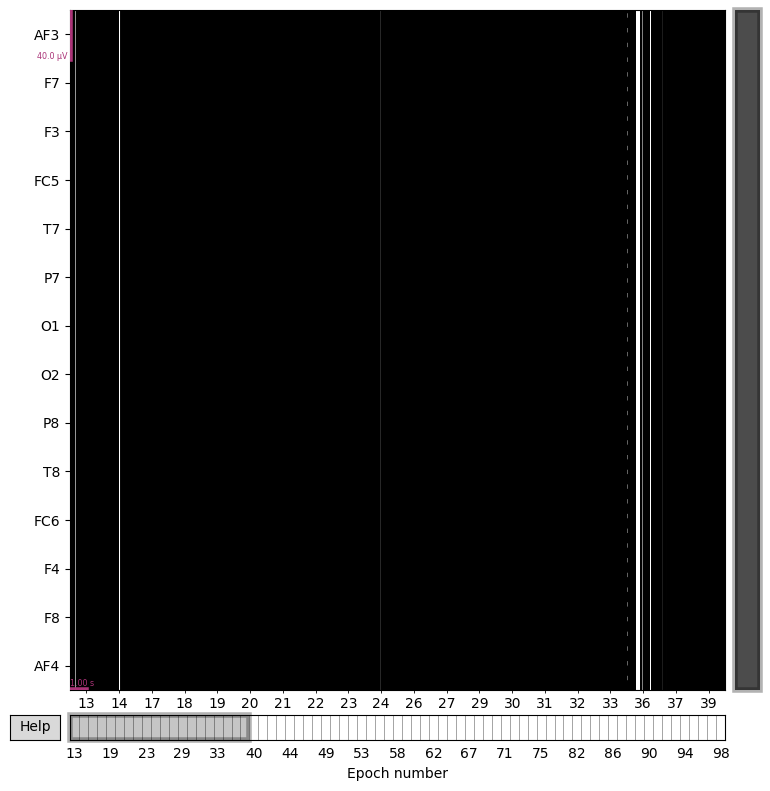

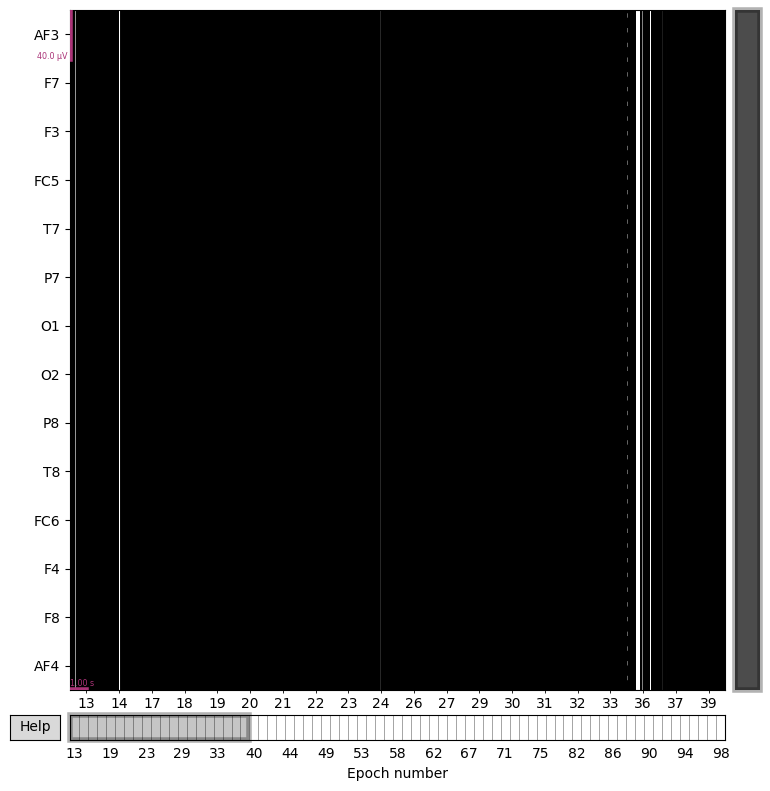

In [71]:
epochs.plot(title="Before ASR-like Repair")
epochs_clean.plot(title="After ASR-like Repair")


In [73]:

# 1) Extract cleaned epoch data
data = epochs_clean.get_data()
# shape: (n_epochs, n_channels, n_times)

# 2) Reshape to continuous EEG (channels, time)
n_epochs, n_channels, n_times = data.shape
data_continuous = (
    data
    .transpose(1, 0, 2)      # (channels, epochs, time)
    .reshape(n_channels, -1) # (channels, epochs*time)
)

# Sanity check
print("Continuous EEG shape:", data_continuous.shape)

# 3) Create new Raw object from continuous data
raw_asr = mne.io.RawArray(data_continuous, raw.info)

# 4) Optional sanity plot (run once if needed)
# raw.plot(start=10, duration=5, title="Before ASR")
# raw_asr.plot(start=10, duration=5, title="After ASR")

# 5) Apply Common Average Referencing (CAR)
raw_asr.set_eeg_reference("average", projection=False)

# 6) Export clean EEG for Phase 3
clean_eeg = raw_asr.get_data()

print("Final clean EEG:", clean_eeg.shape, clean_eeg.dtype)
# Expected: (14, total_samples), float64


Continuous EEG shape: (14, 18688)
Creating RawArray with float64 data, n_channels=14, n_times=18688
    Range : 0 ... 18687 =      0.000 ...   145.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Final clean EEG: (14, 18688) float64


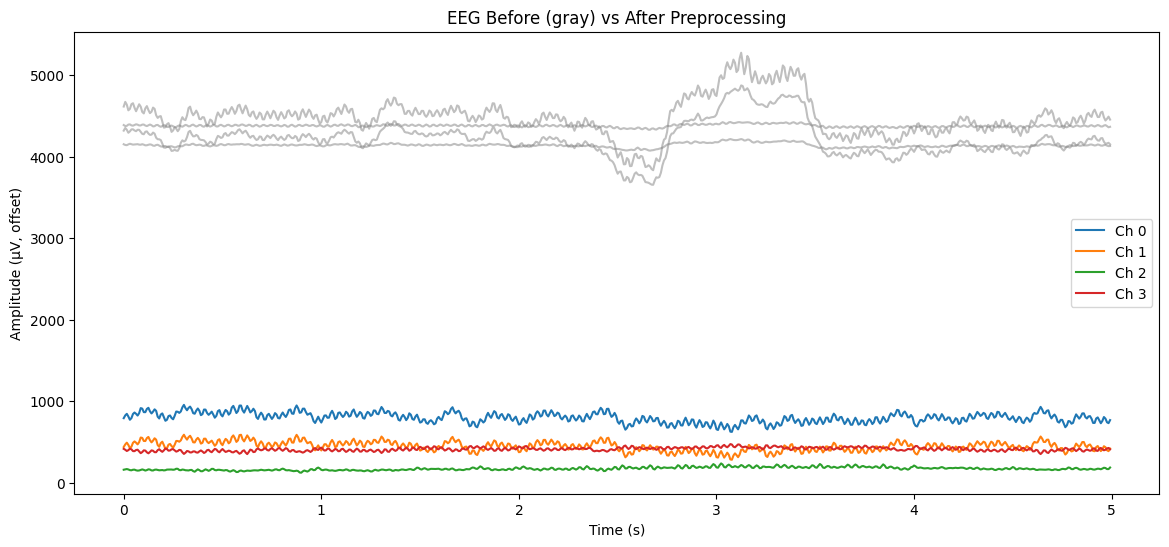

In [74]:
fs = int(raw.info["sfreq"])
duration = 5  # seconds
samples = duration * fs
t = np.arange(samples) / fs

raw_data = raw.get_data()
clean_data = raw_asr.get_data()

plt.figure(figsize=(14, 6))

for ch in range(4):  # first 4 channels
    plt.plot(
        t,
        raw_data[ch, :samples] + ch * 50,
        color="gray",
        alpha=0.5
    )
    plt.plot(
        t,
        clean_data[ch, :samples] + ch * 50,
        label=f"Ch {ch}"
    )

plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV, offset)")
plt.title("EEG Before (gray) vs After Preprocessing")
plt.legend()
plt.show()


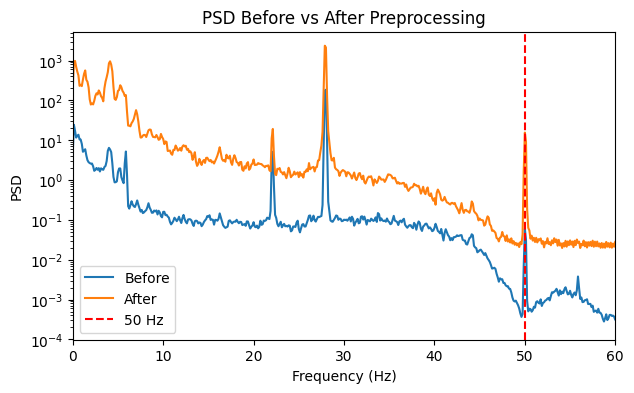

In [75]:
from scipy.signal import welch

freqs, psd_raw = welch(raw_data[0], fs=fs, nperseg=1024)
freqs, psd_clean = welch(clean_data[0], fs=fs, nperseg=1024)

plt.figure(figsize=(7, 4))
plt.semilogy(freqs, psd_raw, label="Before")
plt.semilogy(freqs, psd_clean, label="After")
plt.axvline(50, color="r", linestyle="--", label="50 Hz")
plt.xlim(0, 60)

plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD")
plt.title("PSD Before vs After Preprocessing")
plt.legend()
plt.show()
